In [42]:
from PIL import Image
import numpy as np
from scipy import ndimage
from scipy import signal
import cv2
import pywt
import os

img = Image.open('/content/George_W_Bush_0374.jpg')
imgGray = cv2.imread('/content/George_W_Bush_0374.jpg')
imageNameWithExtension = os.path.basename('/content/12.jpg')
          #print(imageName)
imageName, imageNameWithExtension = os.path.splitext(imageNameWithExtension)

          # convert the filename to an integer using the int() function
imageName = int(imageName)
print(imageName)





12


In [43]:
from google.colab import drive

# Mount your Google Drive to the notebook
drive.mount('/content/drive')

# Navigate to your data directory in the Drive
data_dir = '/content/drive/MyDrive/ImageDataSet2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
def imageFeatures(img,imgGray,imageName):
  import numpy as np
  from scipy import ndimage
  from scipy import signal
  import cv2
  import pywt

  # rgb_matrix = np.array(img.convert('RGB'))

  #Color Histogram
  #HSV space is chosen, each H, S, V component is uniformly quantized into 8, 2 and 2 bins respectively
  hsv_matrix = np.array(img.convert('HSV'))
  hsv_histogram,_ = np.histogramdd(hsv_matrix.reshape(-1, 3), bins=(8, 2, 2), range=((0, 359), (0, 255), (0, 255)))

  vectorColorHistogram = hsv_histogram.flatten()

  #Color Auto Corrleogram
  #The image is quantized into 4x4x4 = 64 colors in the RGB space
  rgb_matrix = np.array(img.convert('RGB'))
  rgb_histogram, _ = np.histogramdd(rgb_matrix.reshape(-1, 3), bins=(4, 4, 4), range=((0, 255), (0, 255), (0, 255)))

  vectorColorAutoCorrelogram = rgb_histogram.flatten()

  #Color Moments
  #The first two moments (mean and standard deviation) from the R,G, B color channels are extracted
  mean_r, std_r = np.mean(rgb_matrix[..., 0]), np.std(rgb_matrix[..., 0])
  mean_g, std_g = np.mean(rgb_matrix[..., 1]), np.std(rgb_matrix[..., 1])
  mean_b, std_b = np.mean(rgb_matrix[..., 2]), np.std(rgb_matrix[..., 2])

  vectorColorMoments = np.array([mean_r, std_r, mean_g, std_g, mean_b, std_b])

  #Gabor wavelet 
  #Gabor wavelet filters spanning four scales: 0.05, 0.1, 0.2, 0.4 and six orientations: θ0 = 0, θn+1 = θn +6π are applied to the image.
  #The mean and standard deviation of the Gabor wavelet coefficients are used to form the feature vector

  scales = [0.05, 0.1, 0.2, 0.4]
  orientations = [0, np.pi/6, np.pi/3, np.pi/2, 2*np.pi/3, 5*np.pi/6]

  # Create a list to store the filter responses
  responses = []

  # Loop over all scales and orientations
  for scale in scales:
      for angle in orientations:
        
          # Define the Gabor filter
          kernel = cv2.getGaborKernel((11, 11), scale, angle, 5, 0.5, 0, ktype=cv2.CV_32F)
        
          # Apply the filter to the image
          filtered = cv2.filter2D(rgb_matrix, cv2.CV_32F, kernel)
        
          # Compute the mean and standard deviation of the filtered response
          mean = np.mean(filtered)
          std = np.std(filtered)
        
          # Append the statistics to the list of responses
          responses.append(mean)
          responses.append(std)

  # Convert the list of responses to a numpy array
  vectorGaborWavelets = np.array(responses)


  #Wavelet moments
  #Applying the wavelet transform to the image with a 3-level decomposition, the mean and the standard deviation of the transform coefficients are used to form the feature vector

  
  gray = cv2.cvtColor(imgGray, cv2.COLOR_BGR2GRAY)

    # Define the wavelet family and number of decomposition levels
  wavelet = 'db2'
  levels = 3

  # Define the size of the feature vector
  feature_size = 40

  # Apply wavelet decomposition
  coeffs = pywt.wavedec2(gray, wavelet, level=levels)

  #print(len(coeffs))

  # Extract the coefficients at each level
  cA3, (cH3, cV3, cD3), (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs

  # Calculate the mean and standard deviation of the coefficients
  means = []
  stds = []
  for c in [cA3, cH3, cV3, cD3, cH2, cV2, cD2, cH1, cV1, cD1]:
      means.append(np.mean(c))
      stds.append(np.std(c))

  # Concatenate the means and stds to form the feature vector
  feature_vector = np.concatenate([means, stds])
  vectorWaveletsMoments =np.concatenate([feature_vector,feature_vector])

 
  total_features= np.concatenate([vectorColorHistogram,vectorColorAutoCorrelogram,vectorColorMoments,vectorGaborWavelets,vectorWaveletsMoments])
  #print(total_features)
  #print(len(total_features))
  #print(imageName)
  # total_features=np.append(total_features,989897)
  #total_features=total_features.concatenate(imageName)
  #print(total_features)
  return total_features








In [45]:
queryImage=imageFeatures(img,imgGray,imageName)
print(queryImage)

[ 2.06220000e+04  1.33860000e+04  1.37880000e+04  2.08000000e+02
  3.50000000e+01  3.55000000e+02  1.60000000e+01  0.00000000e+00
  2.10000000e+01  2.69000000e+02  6.00000000e+00  0.00000000e+00
  7.88200000e+03  6.02000000e+02  4.39000000e+02  0.00000000e+00
  1.41600000e+03  2.51000000e+02  5.20000000e+01  0.00000000e+00
  1.63300000e+03  8.85000000e+02  6.32000000e+02  2.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.50810000e+04  3.10000000e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.80000000e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.78000000e+03  2.46000000e+02  0.00000000e+00  0.00000000e+00
  1.40140000e+04  1.00830000e+04  1.00000000e+01  0.00000000e+00
  0.00000000e+00  1.00000000e+00  3.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [46]:
from tqdm import tqdm

In [48]:
features_dataset=[]
imagesList=[]
labelsforsvm = []
def readImages():
  
  #image_dir='/content/imageDataset'
  for root, dirs, files in os.walk(data_dir):
    for filename in tqdm(files):
    # check if the file is an image file
        if filename.lower().endswith((".jpg", ".jpeg", ".png", ".gif")):
        # open the image file
            #image_path = os.path.join(image_dir, filename)
            image_path = os.path.join(root, filename)
                #print(image_path)
         
            imagesList.append(image_path)
          #print(imagesList)
          #print(image_path)
            imageNameWithExtension = os.path.basename(image_path)
          #print(imageName)
            imageName, imageNameWithExtension = os.path.splitext(imageNameWithExtension)
            last_underscore_index = imageName.rfind("_")
            result = imageName[:last_underscore_index]

          # convert the filename to an integer using the int() function
            #imageName = int(imageName)
            #label=findLabel(imageName)
            labelsforsvm.append(result)
          #print(imageName)

            image = Image.open(image_path)
            imgGray = cv2.imread(image_path)

        # call the imageFeatures method for this image
            vector_features=imageFeatures(image,imgGray,imageName)
          #print(vector_features)
            features_dataset.append(vector_features)

        # close the image file
            image.close()


  







In [49]:
readImages()
#print(features_dataset)

0it [00:00, ?it/s]
100%|██████████| 40/40 [00:13<00:00,  2.90it/s]


In [50]:
def findLabel(imageName):
  if(imageName<=99):
    return "Africans"
  elif(imageName>99 and imageName<=199):
    return "Beach"
  elif(imageName>199 and imageName<=299):
    return "Monument"
  elif(imageName>299 and imageName<=399):
    return "Buses"
  elif(imageName>399 and imageName<=499):
    return "Dinosaurs"
  elif(imageName>499 and imageName<=599):
    return "Elephants"
  elif(imageName>599 and imageName<=699):
    return "Flowers"
  elif(imageName>699 and imageName<=799):
    return "Horses"
  elif(imageName>799 and imageName<=899):
    return "Mountains"
  elif(imageName>899 and imageName<=999):
    return "Food"
  
  


In [51]:
from collections import Counter
labels=[]
def knn(images, query_image, k=5):
    distances = []
    labeels=[]
    for image in images:
        d = np.sum(np.abs(query_image - image))
        #print(d)
        distances.append(d)

    nearest_indices = np.argsort(distances)[:k]
    print("Most Similar K Images:")
    for i in range(k):
      name=imagesList[nearest_indices[i]]
      imgSimilar = Image.open(name)
      imageNameWithExtension = os.path.basename(name)
          #print(imageName)
      imageName, imageNameWithExtension = os.path.splitext(imageNameWithExtension)

          # convert the filename to an integer using the int() function
      # imageName = int(imageName)
      last_underscore_index = imageName.rfind("_")
      result = imageName[:last_underscore_index]
      labeels.append(result)
      print(i)
      imgSimilar.show()
      print()

    #print(labels)
    
    most_common = Counter(labeels).most_common(1)
    print("Predicted Label:")
    print(most_common)
    return most_common[0][0]


Your Query Image:



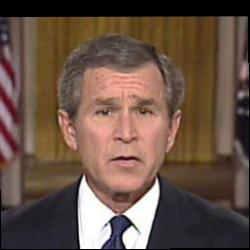



Most Similar K Images:
0


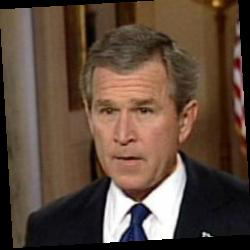


1


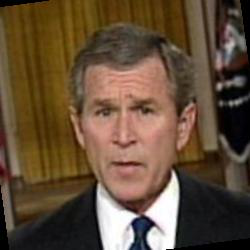


2


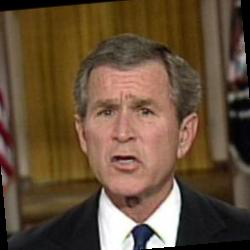


3


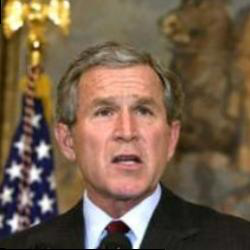


4


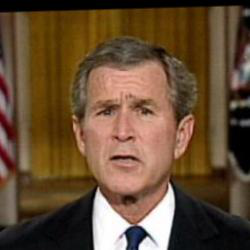


Predicted Label:
[('George_W_Bush', 5)]


In [60]:
print("Your Query Image:")
print()
img.show()
print()
print()
predicted_label = knn(features_dataset, queryImage)

In [54]:
import os
from skimage.io import imread
from sklearn import svm
from skimage.feature import hog
from sklearn.model_selection import train_test_split

def svm_image_classification():
    # Initialize lists to store the feature vectors and labels
    # feature_vectors = []

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_dataset, labelsforsvm, test_size=0.2, random_state=42)

    # Create a SVM classifier object
    clf = svm.SVC(kernel='linear')

    # Train the SVM classifier using the training data
    clf.fit(X_train, y_train)

    # Predict the target values for the testing data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = clf.score(X_test, y_test)


    return accuracy,predict_image_label,clf


In [55]:
def predict_image_label(queryImageForSvm, clf):
    # Load the image and extract HOG features
   

    # Predict the label of the new image
    label = clf.predict([queryImageForSvm])[0]
    return label

In [56]:


accuracy, predict_image_label,clf = svm_image_classification()
print('Accuracy:', accuracy)


Accuracy: 0.8672199170124482


In [61]:
queryImageForSvm=imageFeatures(img,imgGray,imageName)
predicted_label = predict_image_label(queryImageForSvm,clf)
print('Predicted label:', predicted_label)

Predicted label: George_W_Bush
